# CIS 4020
# Assignment 1 - Jason Phung - 1047734
## Part 1 [20 Marks]

[6 Marks] 
# a

Write a simple implementation of a least-squares solution to linear regression that applies an iterative update to adjust the weights. Demonstrate the success of your approach on the sample data loaded below, and visualize the best fit plotted as a line (consider using linspace) against a scatter plot of the x and y test values.


In [39]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
import matplotlib.pyplot as plt 

# Load the diabetes dataset
diabetes = datasets.load_diabetes()


# Use only one feature
diabetes_X = diabetes.data[:, np.newaxis, 2]

# Split the data into training/testing sets
diabetes_X_train = diabetes_X[:-20]
diabetes_X_test = diabetes_X[-20:]

# Split the targets into training/testing sets
diabetes_y_train = diabetes.target[:-20]
diabetes_y_test = diabetes.target[-20:]



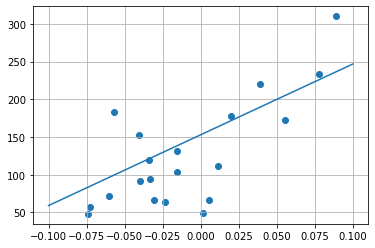

Average Residual:  [-0.1034779]


In [40]:
m = 0;
b = 0;
x_all = 0;
y_all = 0;
x_all_squared = 0;
xy_all = 0;

# To calculate m and b values for the line of best fit (y=mx+b)
i = 0;
while i < len(diabetes_X_train):
    x_all += diabetes_X_train[i];
    y_all += diabetes_y_train[i];
    x_all_squared += diabetes_X_train[i] * diabetes_X_train[i];
    xy_all += diabetes_X_train[i] * diabetes_y_train[i];
    i = i + 1;
    
m = (xy_all - (x_all * y_all / len(diabetes_X_train))) / (x_all_squared - (x_all * x_all / len(diabetes_X_train)));

b = (y_all - (m * x_all)) / len(diabetes_X_train);

residual_avg = 0;
i = 0;
while i < len(diabetes_X_train) - 1:
    residual_avg += diabetes_y_train[i] - (m * diabetes_X_train[i] + b);
    i = i + 1;
    
residual_avg = residual_avg / len(diabetes_X_train);

# To plot the test points with the line of best fit
x = np.linspace(-0.10, 0.10, 10);
y = m * x + b;
plt.plot(x,y);
plt.grid();
plt.scatter(diabetes_X_test, diabetes_y_test);
plt.show();
print('Average Residual: ',residual_avg);

[2 Marks]
# b

Load data on movie ratings, revenue, metadata etc. Split data into a relevant set for training, testing and classification. Explain your choice of split. It is ok if you decide to split into these subsets after part c -> if you do so, mention this at the end of your explanation.

Explanation:
Genres was chosen as a data set because it can be trained to see which genre was the most popular with the popularity data set. Revenue could also be compared with other datasets to estimate a revenue for a given movie. The average a movie was voted can determine how successful a movie was compared to other datasets. Lastly, the budget for a movie could 


In [41]:
### An example to load a csv file
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
from ast import literal_eval
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler
meta_data=pd.read_csv('movies_metadata.csv', low_memory=False) # You may wish to specify types, or process columns once read
ratings_small=pd.read_csv('ratings_small.csv')
import warnings; warnings.simplefilter('ignore')

del ratings_small['timestamp']
#meta_data = meta_data[meta_data['revenue'] > 60000000];

genres = meta_data['genres']; #to see which genre is best
popularity = meta_data['popularity']; #which is most popular
revenue = meta_data['revenue'];
vote_avg = meta_data['vote_average'];
budget = meta_data['budget'];


[5 Marks]
# c

Organize the data into relevant features for predicting revenue. <br>
i.  Explain your feature sets and organization. <br>

YOUR EXPLANATION HERE

ii. Plot movie revenue vs. rating as a scatter plot and discuss your findings. <br>

Looking at the scatter plot for revenue vs vote average, we can see that the higher the vote average was, the more revenue that movie produced. This is evident as we see a rise around a 5 vote average and peaking at 8. This shows that there is a relation between the vote average of a movie and its revenue. One may notice that there do not seem to be any high-earning movies at a vote average of 9 and above. This may be that there are rarely any movies with a vote average of 9 and over. Taking a further look at the data, movies with a vote average of 9 or over usually have less than a 10 vote count. In conclusion, the higher the vote average of a movie, the higher the revenue.

iii. Visualize any other relationships you deem interesting and explain. <br>

Looking at the graph below, there is a clear raise in budget as the higher voted a movie is. Thus showing the more money is put into a movie, the better it will perform at the box offices. 

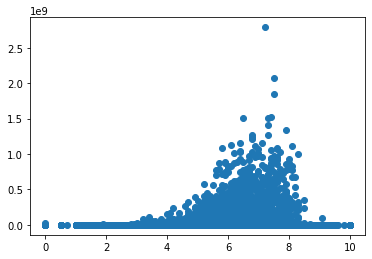

In [42]:
meta_data.head()
# The following line is one way of cleaning up the genres field - there are more verbose ways of doing this that are easier for a human to read
#meta_data['genres'] = meta_data['genres'].fillna('[]').apply(literal_eval).apply(lambda x: [i['name'] for i in x] if isinstance(x, list) else [])
#meta_data['year'] = pd.to_datetime(meta_data['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)
#meta_data.head()
# Consider how to columns look before and after this 'clean-up' - it is very common to have to massage the data to get the right features

plt.scatter(vote_avg, revenue);
plt.show();


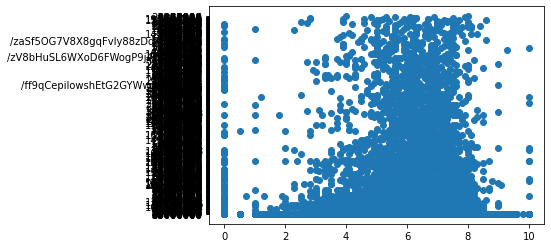

In [43]:

plt.scatter(vote_avg, budget);
plt.show();

[3 Marks]
# d

Train a regression model to predict movie revenue. Plot predicted revenue vs. actual revenue on the test set. Quantify the error in your prediction. (You may use sklearn for this step)

Average Residual: $ 10940306


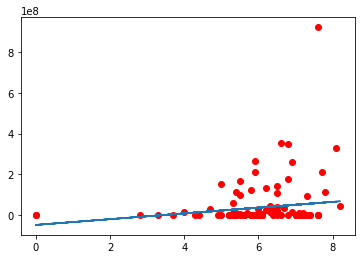

In [44]:
# Regression model here, plot your fit to the revenue data versus the actual data from the test set as a scatter plot.
x_train, x_test, y_train, y_test = train_test_split(vote_avg[0:500], revenue[0:500], test_size = 0.2, random_state = 0);
regression = LinearRegression();
x_train = np.array(x_train);
x_train = x_train.reshape(-1,1);
y_train = np.array(y_train);
#y_train = y_train.reshape(-1,1);

regression.fit(x_train, y_train);

#print(regression.intercept_);
#print(regression.coef_);
x_test = np.array(x_test);
x_test = x_test.reshape(-1,1);
y_test = np.array(y_test);
#y_test = y_test.reshape(-1,1);

pred_y = regression.predict(x_test);
#y_test = y_test.flatten();
#pred_y = pred_y.flatten();

res_avg = 0;
i = 0;

while i < len(y_test):
    res_avg += y_test[i] - pred_y[i];
    i = i + 1;
    
res_avg = res_avg / len(y_test);
print('Average Residual: $', int(res_avg));
plt.scatter(x_test, y_test, color="red"); #the actual revenue
plt.plot(x_test, pred_y); #predicted revenue

[4 Marks]
# e

Try a non-linear fit to the data, with and without regularization. Find your best fit and justify the choice of parameters, regularization constant and norm. Plot predicted revenue vs. actual revenue on the test set. In each case, quantify the error. (See e.g. Generalized linear models, Kernel Ridge regression, SVR and others from sklearn)

In [45]:
##### YOUR CODE HERE WITHOUT REGULARIZATION #######

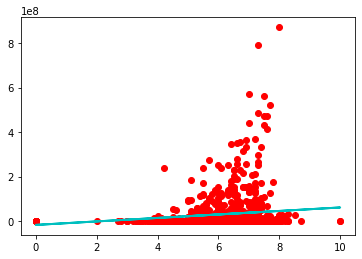

In [46]:
vote_train, vote_test, rev_train, rev_test = train_test_split(vote_avg[0:5000], revenue[0:5000], test_size = 0.2, random_state = 0);

vote_train = np.array(vote_train);
vote_train = vote_train.reshape(-1,1);
rev_train = np.array(rev_train);
vote_test = np.array(vote_test);
vote_test = vote_test.reshape(-1,1);
rev_test = np.array(rev_test);


mdl = Lasso(alpha = 1.0);
mdl.fit(vote_train, rev_train);
pred_rev = mdl.predict(vote_test)

plt.scatter(vote_test, rev_test, color="red");
plt.plot(vote_test, pred_rev, color = 'c', lw = 2);
#plt.plot(vote_test, pred_rev)

## Part 2 [10 Marks]

[4 Marks]
# a

Write a simple version of the basic algorithm for k-means clustering. Simple here means the core of the algorithm and not optimizations or extensions you might find in standard python libraries. Typically you might rely on a standard library for doing this, but it helps to see the core by manipulating the data and labels by hand as practice for numerical python and how to frame the algorithm.

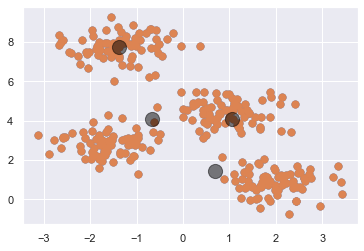

In [47]:
# Import packages
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()  # for plot styling
import numpy as np
from random import randint
import math



# Generate Samples
from sklearn.datasets import make_blobs
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)
plt.scatter(X[:, 0], X[:, 1], s=50);

###############################################
# Since the initial centres are randomized,
# algorithm might not be as optimal until ran 
# multiple times.
###############################################

k = 4; #number of clusters 
centres = {};
new_centres = {};
clusters = {};

 #create an empty array for each clusters
for i in range(k):
    clusters[i] = [];

#K-means Clustering Step 1
for i in range(k):
    centres[i] = X[randint(0, len(X) - 1)];
    
#K-means Clustering Step 2
def calc_clusters(X, centres, k):
    tmp1 = 0;
    tmp2 = 0;
    tmp3 = 0;
    tmp4 = 0;
    clusters = {};

    #create an empty array for each clusters
    for i in range(k):
        clusters[i] = [];
        
    #get the distance fron point X[i] to each centre
    for i in range(len(X)):
        tmp1 = math.sqrt((centres[0][0] - X[:, 0][i]) ** 2 + (centres[0][1] - X[:, 1][i]) ** 2);
        tmp2 = math.sqrt((centres[1][0] - X[:, 0][i]) ** 2 + (centres[1][1] - X[:, 1][i]) ** 2);
        tmp3 = math.sqrt((centres[2][0] - X[:, 0][i]) ** 2 + (centres[2][1] - X[:, 1][i]) ** 2);
        tmp4 = math.sqrt((centres[3][0] - X[:, 0][i]) ** 2 + (centres[3][1] - X[:, 1][i]) ** 2);
    
        shortest_dist = min(tmp1,tmp2,tmp3,tmp4);
        
        #put point X[i] into its corresponding cluster 
        if shortest_dist == tmp1:
            clusters[0].append(X[i]);
        elif shortest_dist == tmp2:
            clusters[1].append(X[i]);
        elif shortest_dist == tmp3:
            clusters[2].append(X[i]);
        elif shortest_dist == tmp4:
            clusters[3].append(X[i]);
    return clusters

#K-means Clustering Step 3
def recalc_centre(centres, clusters, k):
    for i in range(k):
        centres[i] = np.average(clusters[i], axis = 0);
    return centres;

clusters = calc_clusters(X,centres, k);
new_centres = recalc_centre(centres, clusters, k);

#K-means Clustering Step 4
while centres != new_centres:
    centres = new_centres;
    clusters = calc_clusters(X, centres, k);
    new_centres = recalc_centre(centres, clusters, k);
    
# Uncomment to display clusters and cluster centers
plt.scatter(X[:, 0], X[:, 1],
            s=50, cmap='viridis');
for i in range(k):
    plt.scatter(centres[i][0], centres[i][1], c='black', s=200, alpha=0.5);

<a id="data set"></a>
[6 Marks]
# b

Load the mystery data below, and cluster the data (you don't need to use your code from part a). Visualize the data including assigned cluster labels.

(30309, 784)


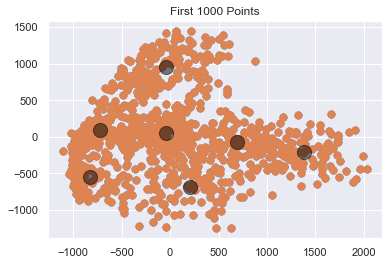

In [48]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Load the mystery data here and cluster using k-means (now you can use libraries e.g. sklearn)
mystery = np.load('mystery.npy')
print(mystery.shape)

pca = PCA(n_components = 2)

prinComp = pca.fit_transform(mystery[0:1000])
plt.scatter(prinComp[:, 0], prinComp[:, 1], s=50);

kmeans = KMeans(n_clusters = 7, random_state = 0).fit(prinComp)

plt.title('First 1000 Points')
plt.scatter(prinComp[:, 0], prinComp[:, 1],
            s=50, cmap='viridis');
for i in range(7):
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], c='black', s=200, alpha=0.5);



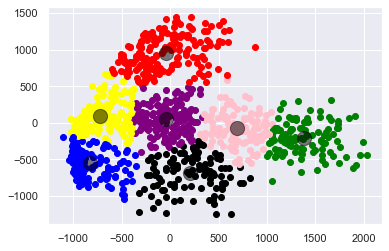

In [49]:
# Find a way to visualize the data (e.g. in 2D or 3D), color datapoints based on assigned labels.
colour = ['red', 'blue', 'black', 'green', 'yellow', 'pink', 'purple']; 
for i in range(len(prinComp)):
    plt.scatter(prinComp[i][0], prinComp[i][1], c = colour[kmeans.labels_[i]]);
    
for i in range(7):
    plt.scatter(kmeans.cluster_centers_[i][0], kmeans.cluster_centers_[i][1], c='black', s=200, alpha=0.5);

Based on the results above and any other analysis you wish to include, discuss how many clusters you see in the data.

When plotting less than 1000 points, we can clearly see roughly 7 clusters. Using PCA to lower the dimension to 2D helps us represent this data set in a 2D plot.

(any additional code supporting your assertion on the number of clusters may be included below)

In [50]:
##### YOUR (OPTIONAL) CODE HERE #######

[2 Marks]
# Bonus

What is the mystery data in part 2? Show this in markdown and code below.

EXPLANATION HERE, code goes below.

In [51]:
##### YOUR (OPTIONAL) CODE HERE #######

[10 Marks]
# Challenge question (required)

Describe how you might implement a solution to recommend new movies to a user based on their existing preferences or ratings from Part 1.

To implement a very simple recommending system, I would first find the highest rated movie for the user we are trying to find recommendations for. Then I will find all instance of this movie, and filter it to see who else rated it the same. Then, find the highest rated movie for this new user. This will be the recommeneded movie. Although this is not a very effective recommending system, it will still give a movie that might be similar to the user's highest rated movie. 

In [52]:

ratings_small = np.array(ratings_small);
recommended = [];
#Data for one individual user
movieID = ratings_small[4][1];
rating = ratings_small[4][2];

for i in range(len(ratings_small)):
    if ratings_small[i][1] == movieID:
        if ratings_small[i][2] >= rating:
            recommended.append(ratings_small[i]);
    i = i + 1;

rec_user = recommended[1][0];
rmovies = [];

for i in range(len (ratings_small)):
    if ratings_small[i][0] == int(rec_user):
        if ratings_small[i][2] >= rating:
            rmovies.append(ratings_small[i][1]);
            
print('Recommended Movies: ', rmovies[0:10]);

#ratings_small.head()



Recommended Movies:  [16.0, 32.0, 47.0, 50.0, 62.0, 89.0, 111.0, 154.0, 224.0, 235.0]
